<a href="https://colab.research.google.com/github/Riccardolotorto/graficiMatPlotLib/blob/main/VerificaLotorto_recuperoMatPlotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scrivere le istruzioni necessarie per ottenere i grafici già presenti nel notebook. Creare esattamente gli stessi grafici (colori, nomi degli assi, dimensioni, ...) di quelli presenti nel notebook. Suggerimento: creare un nuovo notebook e utilizzare quello fornito dal docente come riferimento


In [ ]:
# https://dati.comune.milano.it/dataset/ds1880-studenti-scuola-secondaria-di-secondo-grado-per-indirizzo-scuola-statale-as-2020-2021

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LOTORTO RICCARDO - ds1880_studenti_scuola_secondaria_2grado_sudd_indirizzo_statale_as_2020_2021.csv', on_bad_lines='skip', sep = ';')

In [ ]:
df.head(1)

1. Visualizzare il grafico a barre verticali degli studenti per ogni tipologia di percorso

In [ ]:
dfPercorso = df.groupby('PERCORSO')[['CAPSCUOLA']].count().sort_values(by='CAPSCUOLA', ascending = False).reset_index()
dfPercorso

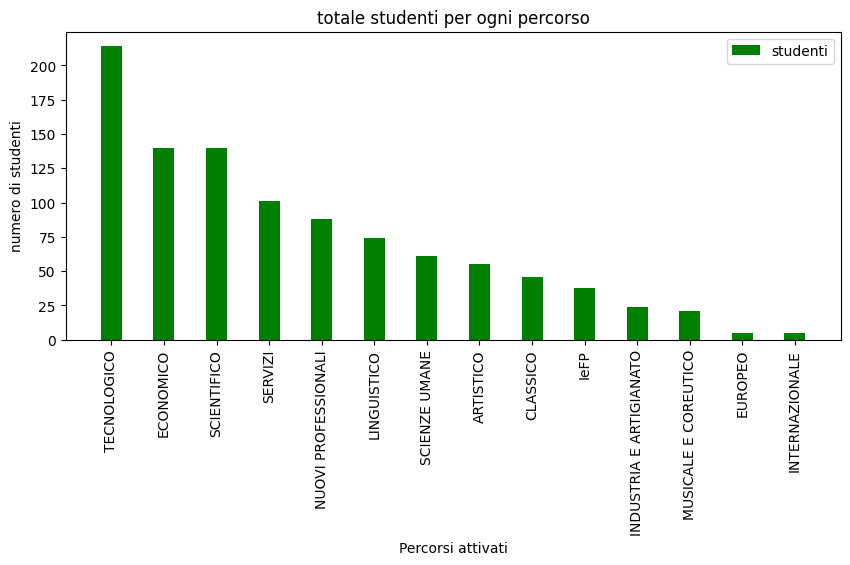

In [61]:
stringhe = dfPercorso['PERCORSO'].map(str)
dati = dfPercorso['CAPSCUOLA']

width = 0.4
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(stringhe, dati, width, label='studenti', color = 'green')

ax.set_ylabel('numero di studenti')
ax.set_xlabel('Percorsi attivati')
ax.set_title('totale studenti per ogni percorso')
plt.xticks(rotation = (90))
ax.legend() 

2. Visualizzare gli stessi dati di prima con un grafico a barre orizzontali

In [33]:
dfPercorso2 = df.groupby('PERCORSO')[['CAPSCUOLA']].count().sort_values(by='CAPSCUOLA', ascending = True).reset_index()

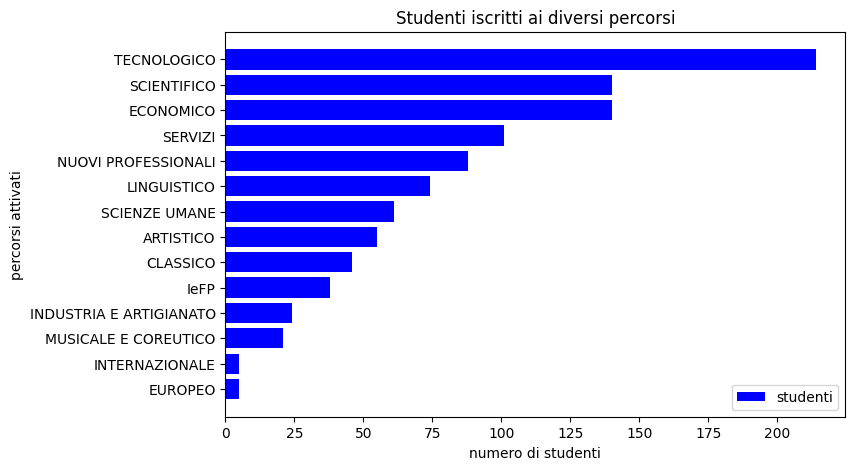

In [62]:
stringhe = dfPercorso2['PERCORSO'].map(str)
dati = dfPercorso2['CAPSCUOLA']

width = 0.8
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(stringhe, dati, width, label='studenti', color = 'blue')

ax.set_ylabel('percorsi attivati')
ax.set_xlabel('numero di studenti')
ax.set_title('Studenti iscritti ai diversi percorsi')
ax.legend() 

3. cambiare i colori del grafico precedente in modo che siano come quelli del grafico seguente

Text(0.5, 1.0, 'Studenti iscritti ai diversi percorsi')

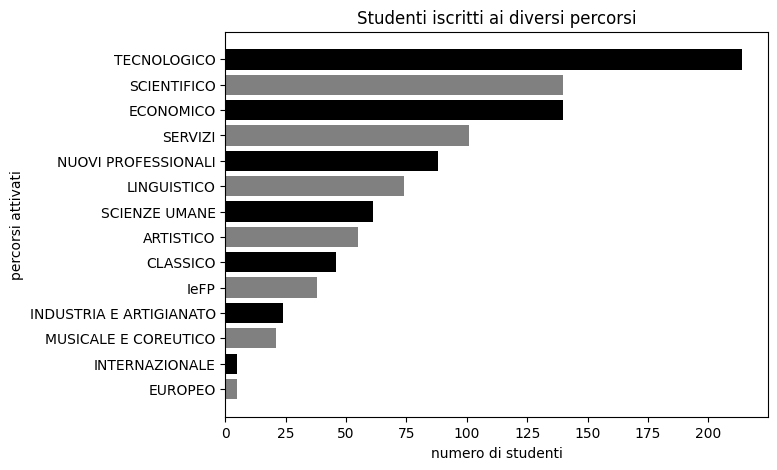

In [81]:
stringhe = dfPercorso2['PERCORSO'].map(str)
dati = dfPercorso2['CAPSCUOLA']

width = 0.8
fig, ax = plt.subplots(figsize=(7,5))
ax.barh(stringhe, dati, width, color = ['gray', 'black'])

ax.set_ylabel('percorsi attivati')
ax.set_xlabel('numero di studenti')
ax.set_title('Studenti iscritti ai diversi percorsi')

4. Visualizzare gli stessi dati dellìesercizio precedente con un grafico a torta

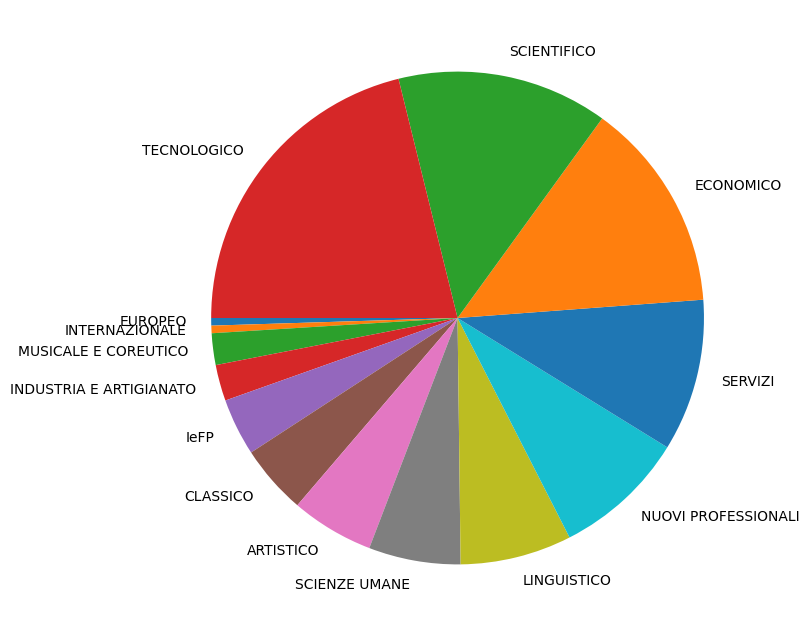

In [64]:
stringhe = dfPercorso2['PERCORSO']
dati = dfPercorso2['CAPSCUOLA']

plt.figure(figsize=(16, 8))
plt.pie(dati, labels=stringhe, startangle = 180)
plt.show()

5. Aggiungere al grafico a torta le percentuali e ruotare il grafico come da disegno

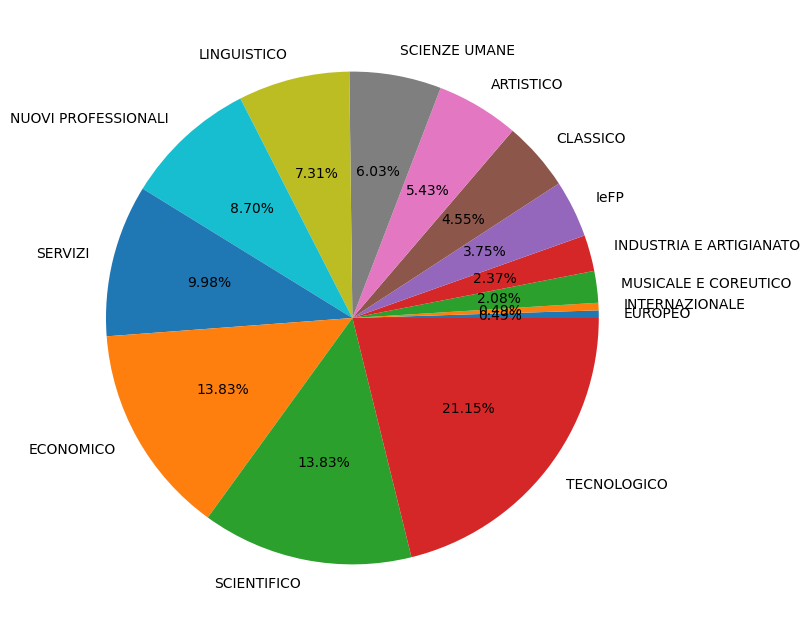

In [65]:
stringhe = dfPercorso2['PERCORSO']
dati = dfPercorso2['CAPSCUOLA']

plt.figure(figsize=(16, 8))
plt.pie(dati, labels=stringhe, autopct = '%1.2f%%')
plt.show()

6. Visualizzare il grafico a barre verticali del numero di studenti maschi e femmine per ogni percorso di studi

In [ ]:
maschi = df.groupby('PERCORSO')[['ALUNNIMASCHI']].sum().reset_index()
maschi

In [ ]:
femmine = df.groupby('PERCORSO')[['ALUNNIFEMMINE']].sum().reset_index()
femmine

In [ ]:
finale = maschi.merge(femmine, on = 'PERCORSO')
finale

In [53]:
import numpy as np

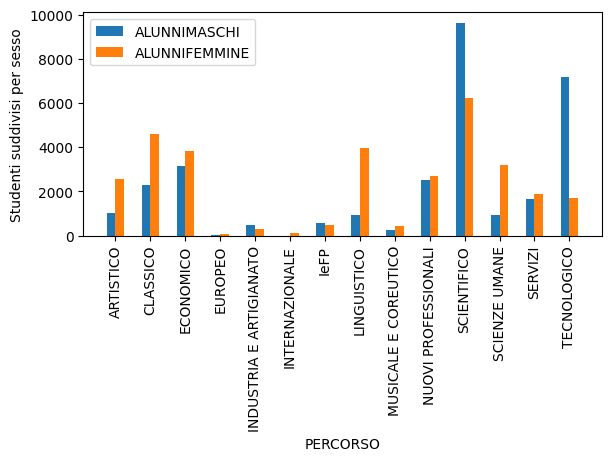

In [72]:
stringhe = finale['PERCORSO']
dati = {
    "ALUNNIMASCHI": np.array(finale['ALUNNIMASCHI']),
    "ALUNNIFEMMINE": np.array(finale['ALUNNIFEMMINE'])
}

x = np.arange(len(stringhe))
width = 0.25  
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained', figsize = (6, 4.5))

for nome, valore in dati.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, valore, width, label=nome)
    multiplier += 1

ax.set_ylabel('Studenti suddivisi per sesso')
ax.set_xlabel('PERCORSO')
ax.set_xticks(x + width, stringhe)
ax.legend(loc='upper left')
plt.xticks(rotation = (90))

plt.show()

7. Visualizzare gli stessi dati con un grafico a barre orizzontali

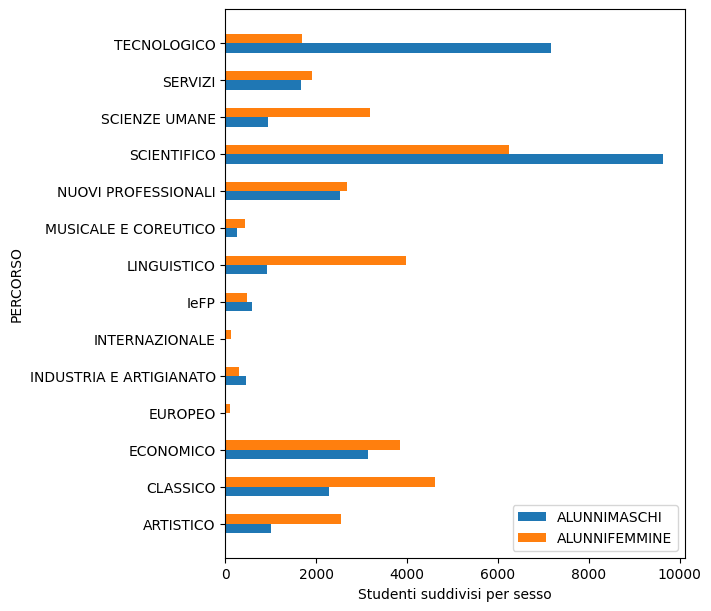

In [83]:
stringhe = finale['PERCORSO']
dati = {
    "ALUNNIMASCHI": np.array(finale['ALUNNIMASCHI']),
    "ALUNNIFEMMINE": np.array(finale['ALUNNIFEMMINE'])
}

y = np.arange(len(stringhe))
width = 0.25  
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained', figsize = (7, 6))

for nome, valore in dati.items():
    offset = width * multiplier
    rects = ax.barh(y + offset, valore, width, label=nome)
    multiplier += 1

ax.set_ylabel('PERCORSO')
ax.set_xlabel('Studenti suddivisi per sesso')
ax.set_yticks(y + width, stringhe)
ax.legend(loc='lower right')

plt.show()

8. Visualizzare il numero di studenti maschi e femmine di un percorso di studi inserito dall'utente. Nell'immagine seguente il caso di un utente che ha inserito il percorso TECNOLOGICO

inserisci un percorso: TECNOLOGICO


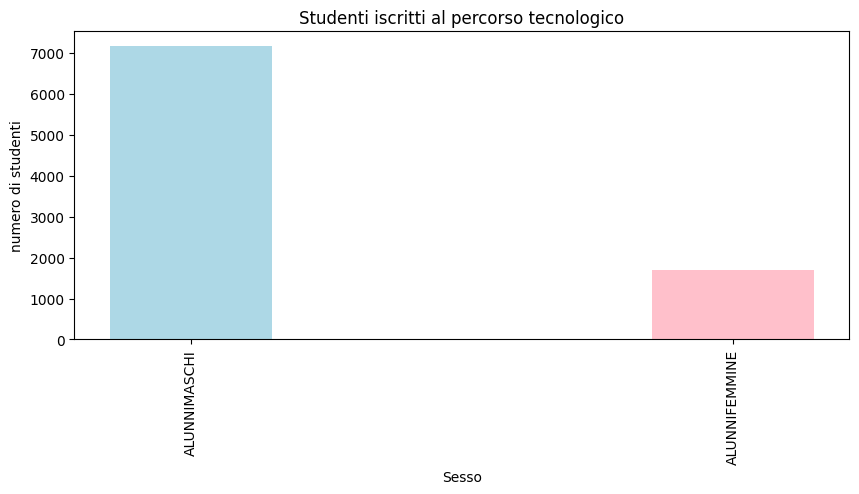

In [80]:
percorsoSelezionato = input('inserisci un percorso: ')
maschiPercorsoSelezionato = df[df.PERCORSO == percorsoSelezionato]['ALUNNIMASCHI'].sum()
femminePercorsoSelezionato = df[df.PERCORSO == percorsoSelezionato]['ALUNNIFEMMINE'].sum()

stringhe = ['ALUNNIMASCHI', 'ALUNNIFEMMINE']
dati = [maschiPercorsoSelezionato, femminePercorsoSelezionato]

width = 0.3
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(stringhe, dati, width, color = ['lightblue', 'pink'])

ax.set_ylabel('numero di studenti')
ax.set_xlabel('Sesso')
ax.set_title('Studenti iscritti al percorso ' + percorsoSelezionato.lower())
plt.xticks(rotation = (90))
plt.show()